Problem 1: 

Demonstrate to yourself in MATLAB that Parseval’s relation
works for any signal x, i.e. sum(x.^2) is the same as
sum(abs(fft(x).^2))/length(x). Note the difference between the
right-hand side of Equation 10-3 and the syntax provided. Explain
why the difference is necessary.

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.io as sp
import pandas as pd
from datetime import datetime, timedelta
import scipy as spy
from scipy import signal

x = np.array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]) # create array for test 
x_test = sum(np.square(x))
y = np.fft.fft(x) # use fft on array 
x_fft_test = np.sum(np.abs(np.square(y)))/len(x) # determine if the values are the same 

Answer to Problem 1: 
The values are indeed the same. The reason the format is different is because by squaring the array in the first part without the fft, there are no imaginary components involved. Therefore by squaring the array you would remove all negatives, the absolute value is require in the fft step because squaring an imaginary number provides a negative result. Lastly, the new array has to be divided by the length because the sum of the all positive values in an fft will be double N samples because there is no longer any reflection of positive/negative values. 

Problem 2: 

Now read in Erebus_velocity.mat. The data are already provided
to you in units of m/s. Please note that Erebus_seismogram.mat gives
the same data, but in units of counts. Plot the time series in terms
of power units (m^2/s^2). Then, knowing that sample rate of this
waveform is 40 Hz, calculate the total energy of this signal in units
of m^2/s. Remember from previous homework to consider the
integration time constant! Calculate also the average power of this
signal in units of m^2/s^2.

dict_keys(['__header__', '__version__', '__globals__', 'hdr', 'vel'])
The total enegy is 4.623679874720925e-10 The average power is 2.568711041511625e-12


Text(0, 0.5, 'Amplitude')

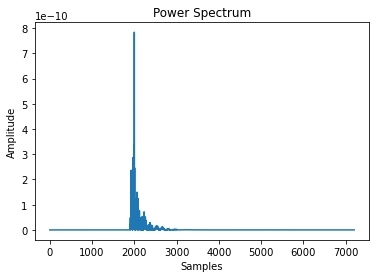

In [25]:
seis = sp.loadmat('./Erebus_velocity.mat')
print(seis.keys())
vel = seis['vel']
vel = vel.ravel()
sr = 40 #sample rate in Hz
power = np.square(vel)
av_power = np.mean(power)
energy = power/sr
tot_energy =  np.sum(power)/sr
# total_energy = sum(tot_energy)
print('The total enegy is', tot_energy, 'The average power is', av_power)
time = np.linspace(0, len(power), len(power))
plt.plot(time, power)
plt.title('Power Spectrum')
plt.xlabel('Samples')
plt.ylabel('Amplitude')

Problem 3: 

Convert the velocity waveform to its amplitude spectrum using
fft. Then compute the power spectrum as the squared amplitude
spectrum. Plot the power spectrum with the appropriate frequency
axis and appropriate amplitude in units of m^2/s^2/Hz. The correct
amplitude is fairly hard to get right and to get it correct you will
need to do some thinking. Check your result by making sure that the
integrated power spectrum is equivalent to the average power

calculated in part 2. Note that you will want to know the frequency
axis increment in your power spectrum.

Text(0, 0.5, 'Amplitude')

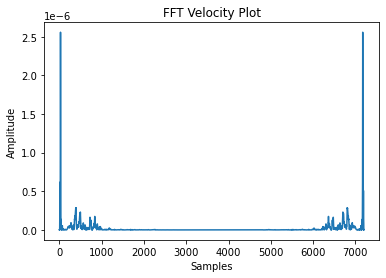

In [24]:
freq = np.fft.fft(vel) # create the frequency spectrum 
power_spec = np.square(np.abs(freq))

plt.plot(np.square(np.abs(freq))) #square amplitide spectrum 

sum(power_spec)
plt.title('FFT Velocity Plot')
plt.xlabel('Samples')
plt.ylabel('Amplitude')


Problem 4: 

You’ll note that the calculated spectrum has an excessive amount
of spectral detail. Smooth the spectrum by applying a running
average filter for 18 consecutive points, i.e. h = ones(18,1)/18.
Use conv to smooth your spectrum by the input response h and keep the
output signal the same length by using the option of ‘same’. Is the
integrated original power spectrum total equal to the smoothed power
spectrum? Why or why not?

Text(0, 0.5, 'Amplitude')

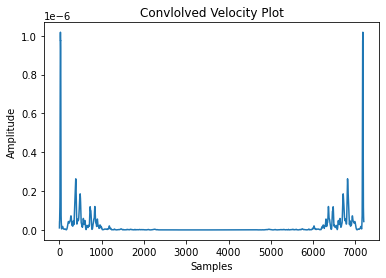

In [23]:
h = np.ones(18)
h = h/18
conv_vel = np.convolve(power_spec, h, mode = 'same')
# conv_data= np.convolve(medfilt_co2, norm_h, mode = 'same')
plt.plot(conv_vel)
sum(conv_vel)
plt.title('Convlolved Velocity Plot')
plt.xlabel('Samples')
plt.ylabel('Amplitude')

Answer: The sum of the convolution and original power specturm both equal 1.3X10^-4


Problem 5: Plot your power spectrum in decibels where peak spectral
amplitude is fixed at 0 dB. Make your limits go from 0 to 10 Hz and
-60 to +1 dB.

Text(0, 0.5, 'Amplitude')

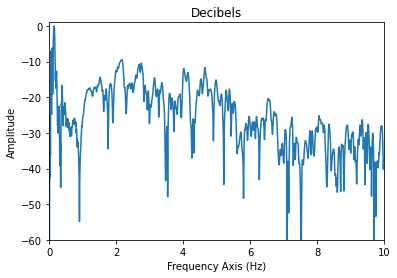

In [22]:
# Need the frequency conversion for this 10log(YinputYref) for power 
db_power = 10*np.log10(power_spec/np.max(power_spec))
db_power = db_power.ravel()
freq_ax =np.linspace(0,40, len(power_spec))
plt.plot(freq_ax,db_power)
plt.xlim(0,10)
plt.ylim(-60, 1)
plt.title('Decibels')
plt.xlabel('Frequency Axis (Hz)')
plt.ylabel('Amplitude')

Problem 6: 
Convert your velocity time series to an acceleration time
series. (Recall that you did this in assignment #3). Once properly
converted, plot the acceleration data as a power spectrum (amplitude
squared). How does the power spectrum of acceleration differ from
that of velocity (i.e., which frequencies are emphasized?) Thought
question... how does the phase of the acceleration spectrum differ from
the velocity spectrum?


Text(0, 0.5, 'Amplitude')

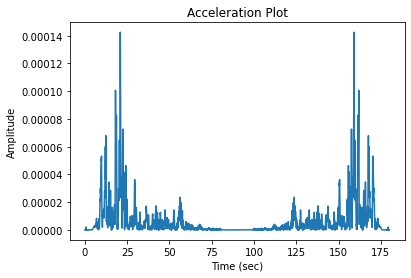

In [20]:
differ = np.diff(vel.ravel()*sr)
differ = np.fft.fft(differ)
differ = np.abs(differ)
differ_sq = np.square(differ)
t = np.linspace(vel[0],(len(vel)-1)/sr, (len(vel)-1))
t = t.ravel()
plt.plot(t,differ_sq)
plt.title('Acceleration Plot')
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')

Answer to Prblem 6: 
By differentiating the velocity data we are creating a phase shift of pi/2 because we are changing the data from either a sine wave to a cosine wave.The frequencies that are distinguishable here are the frequencies near 20 to 25 seconds and 150-175 seconds 

Text(0, 0.5, 'Amplitude')

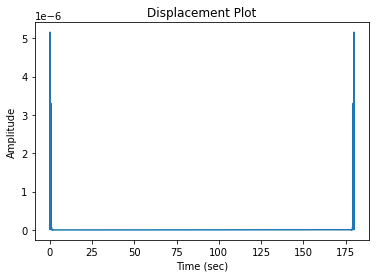

In [21]:
time = 1/sr
cum_sum = np.cumsum(vel)*time
cum_sum = np.fft.fft(cum_sum)
cum_sum = np.abs(cum_sum)
cum_sum = np.square(cum_sum)
t = np.linspace(vel[0],len(vel)/sr, len(vel))
t = t.ravel()
plt.plot(t, cum_sum)
plt.title('Displacement Plot')
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')

Answers to Problem 7: 
The phase shift here would be another pi/2 phase shift sicne we are integrating from velocity to displacement . the frequencies that are most obvious would be the the frequencies at time = 0 and the those at the end of time interval 
